# Лабораторная работа №2

Пример для варианта 1

t = 0...10

$x = 15\sin\left(\frac{\pi t}{5} + \frac{\pi}{8}\right) + 25\cos\left(\frac{\pi t}{15}\right) + 3\sin\left(\frac{\pi t}{45} + \frac{\pi}{10}\right)$

$y = 6x^2 + 3x$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Задаём диапазон t и количество точек
resolution = 100
t = np.linspace(0, 10, resolution)  # resolution точек от 0 до 10
t

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

In [8]:
# Определяем сигналы x(t) и y(t)
x = 15*np.sin(np.pi*t/5 + np.pi/8) \
  + 25*np.cos(np.pi*t/15) \
  + 3*np.sin(np.pi*t/45 + np.pi/10)

y = 6*x**2 + 3*x

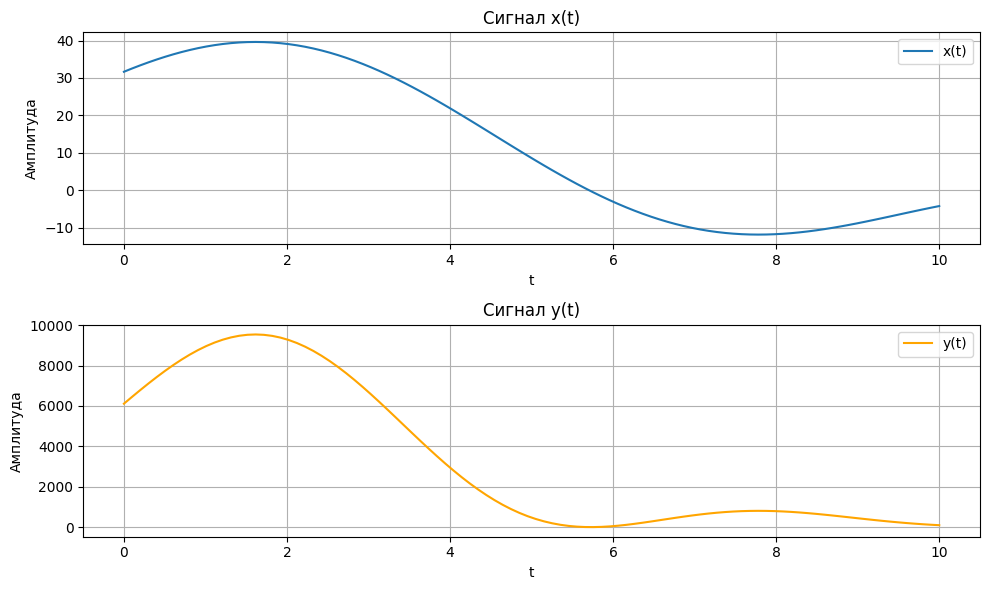

In [9]:
# Строим графики сигналов
fig, ax = plt.subplots(2, 1, figsize=(10, 6))

ax[0].plot(t, x, label="x(t)")
ax[0].set_title("Сигнал x(t)")
ax[0].set_xlabel("t")
ax[0].set_ylabel("Амплитуда")
ax[0].grid(True)
ax[0].legend()

ax[1].plot(t, y, color="orange", label="y(t)")
ax[1].set_title("Сигнал y(t)")
ax[1].set_xlabel("t")
ax[1].set_ylabel("Амплитуда")
ax[1].grid(True)
ax[1].legend()

fig.tight_layout()
plt.show()

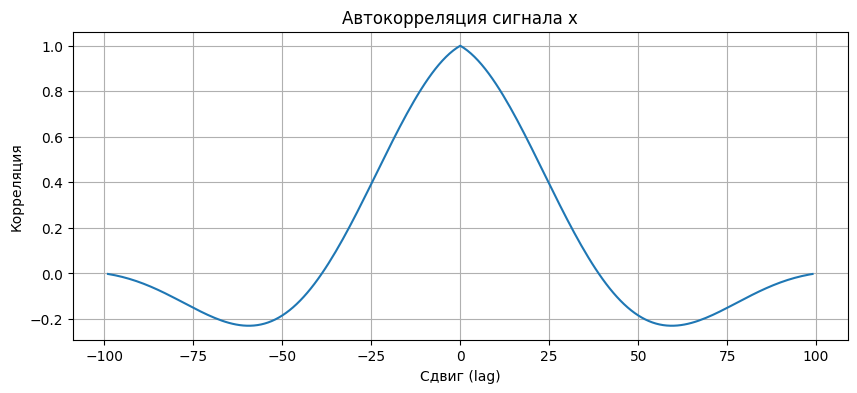

In [ ]:
# Автокорреляция для x
auto_x = np.correlate(x, x, mode="full")
auto_x = auto_x / np.max(auto_x)  # нормируем
lags_x = np.arange(-len(x)+1, len(x))

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(lags_x, auto_x)
ax.set_title("Автокорреляция сигнала x")
ax.set_xlabel("Сдвиг (lag)")
ax.set_ylabel("Корреляция")
ax.grid(True)

Автокорреляция сигнала **x**

* В центре (при сдвиге = 0) значение корреляции = 1 - это нормально, т.к. сигнал всегда полностью совпадает сам с собой
* При увеличении сдвига кривая убывает: чем больше сдвиг, тем меньше схожесть сигнала с самим собой
* Видно "бугры" и "провалы" - это отражает периодичность и внутреннюю структуру сигнала $x(t)$

**Вывод:** сигнал $x$ имеет ярко выраженные повторяющиеся участки, но не идеально периодичен (иначе были бы чёткие пики на кратных сдвигах)

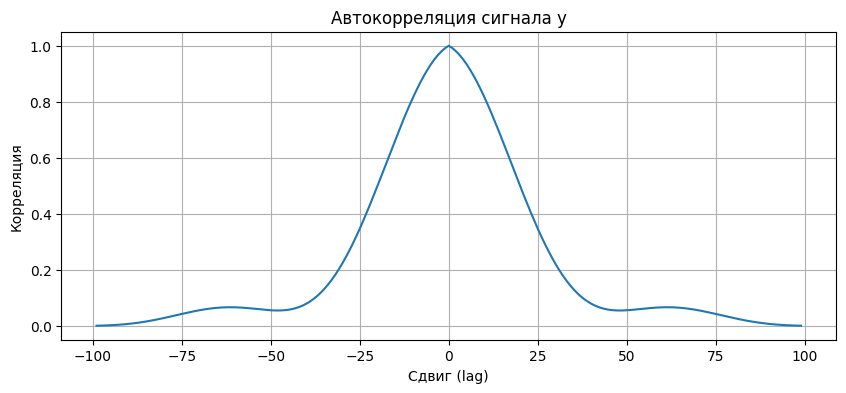

In [18]:
# Автокорреляция для y
auto_y = np.correlate(y, y, mode="full")
auto_y = auto_y / np.max(auto_y)
lags_y = np.arange(-len(y)+1, len(y))

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(lags_y, auto_y)
ax.set_title("Автокорреляция сигнала y")
ax.set_xlabel("Сдвиг (lag)")
ax.set_ylabel("Корреляция")
ax.grid(True)

Автокорреляция сигнала **y**

* Тоже максимум при сдвиге = 0
* Кривая выглядит более "сглаженной" и симметричной, чем у $x$
* Это потому, что $y$ был построен как нелинейная функция от $x$ (квадрат + линейная часть), и его значения распределены более равномерно

**Вывод:** автокорреляция показывает, что у $y$ меньше выраженных периодических компонентов, сигнал более "сглажен" и меньше напоминает повторяющийся шаблон.

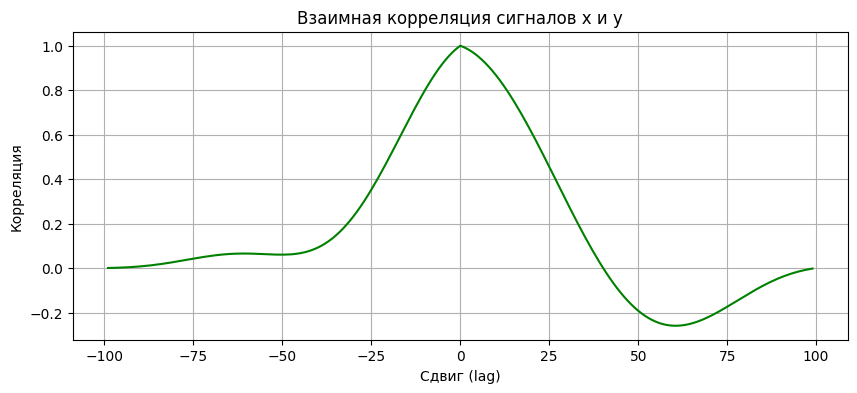

In [19]:
# Взаимная корреляция между x и y
cross_xy = np.correlate(x, y, mode="full")
cross_xy = cross_xy / np.max(np.abs(cross_xy))
lags_xy = np.arange(-len(x)+1, len(x))

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(lags_xy, cross_xy, color="green")
ax.set_title("Взаимная корреляция сигналов x и y")
ax.set_xlabel("Сдвиг (lag)")
ax.set_ylabel("Корреляция")
ax.grid(True)

Взаимная корреляция сигналов **x и y**

* Пик при сдвиге = 0 показывает, что сигналы $x$ и $y$ максимально связаны без задержки
* Значения симметрично убывают при увеличении сдвига - чем дальше мы сдвигаем $y$ относительно $x$, тем слабее связь
* Кривая похожа на автокорреляцию $x$, но "сглаженнее" (так как $y$ является функцией от $x$)

**Вывод:** $x$ и $y$ сильно коррелируют между собой, особенно без сдвига, что ожидаемо, ведь $y$ напрямую вычислен через $x$

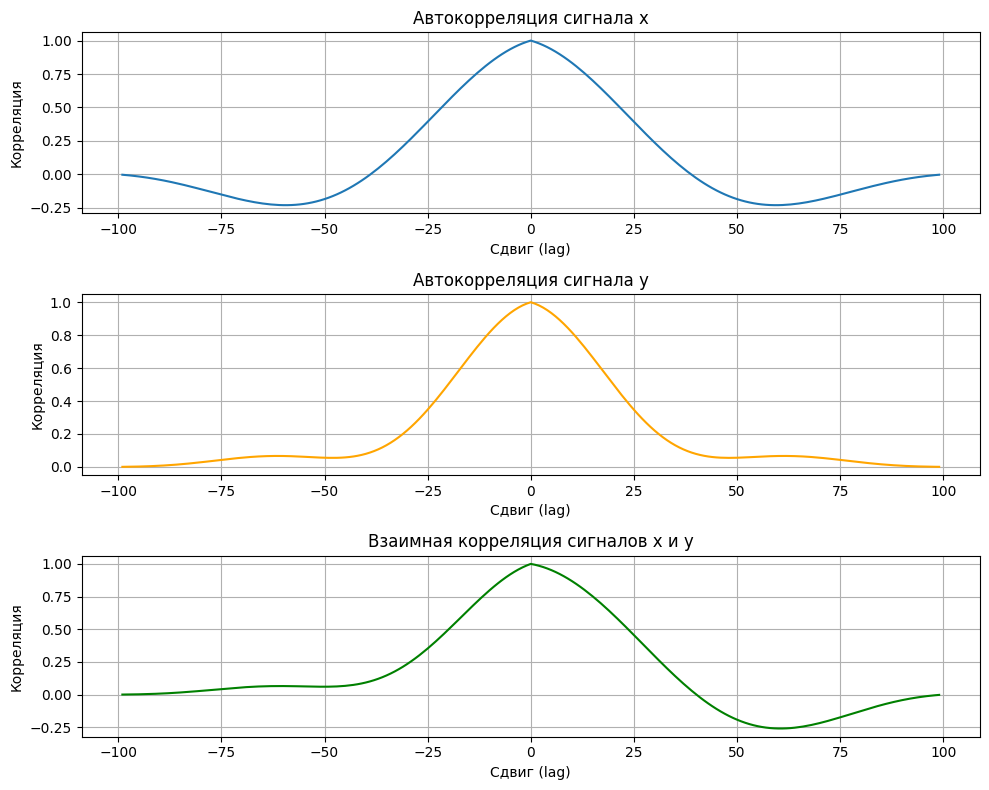

In [20]:
# Строим графики (все сразу)
fig, ax = plt.subplots(3, 1, figsize=(10, 8))

ax[0].plot(lags_x, auto_x)
ax[0].set_title("Автокорреляция сигнала x")
ax[0].set_xlabel("Сдвиг (lag)")
ax[0].set_ylabel("Корреляция")
ax[0].grid(True)

ax[1].plot(lags_y, auto_y, color="orange")
ax[1].set_title("Автокорреляция сигнала y")
ax[1].set_xlabel("Сдвиг (lag)")
ax[1].set_ylabel("Корреляция")
ax[1].grid(True)

ax[2].plot(lags_xy, cross_xy, color="green")
ax[2].set_title("Взаимная корреляция сигналов x и y")
ax[2].set_xlabel("Сдвиг (lag)")
ax[2].set_ylabel("Корреляция")
ax[2].grid(True)

fig.tight_layout()
plt.show()